In [1]:
import matplotlib.pyplot as plt
import pandas as pd

tbl = pd.read_excel('hypertension.xlsx')


In [2]:
tbl.columns

Index(['年龄', '中性粒细胞数', '淋巴细胞数', '嗜酸性粒细胞数', '嗜碱性粒细胞数', '总蛋白', '白蛋白', '球蛋白',
       '总胆红素', '直接胆红素', '钾', '钠', '钙', '尿素氮', '谷草谷丙', '甘油三酯', '高密度脂蛋白',
       '低密度脂蛋白', '红细胞平均体积', '凝血酶原时间', '国际标准化比值', '活化部分凝血活酶时间', '纤维蛋白原',
       '是否高血压'],
      dtype='object')

In [8]:
tbl[tbl['是否高血压'] == 1].count()

年龄            16215
中性粒细胞数        16215
淋巴细胞数         16215
嗜酸性粒细胞数       16215
嗜碱性粒细胞数       16215
总蛋白           16215
白蛋白           16215
球蛋白           16215
总胆红素          16215
直接胆红素         16215
钾             16215
钠             16215
钙             16215
尿素氮           16215
谷草谷丙          16215
甘油三酯          16215
高密度脂蛋白        16215
低密度脂蛋白        16215
红细胞平均体积       16215
凝血酶原时间        16215
国际标准化比值       16215
活化部分凝血活酶时间    16215
纤维蛋白原         16215
是否高血压         16215
dtype: int64

Text(0.5, 1.0, '五年内是否患上高血压')

/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/home/gyli/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning

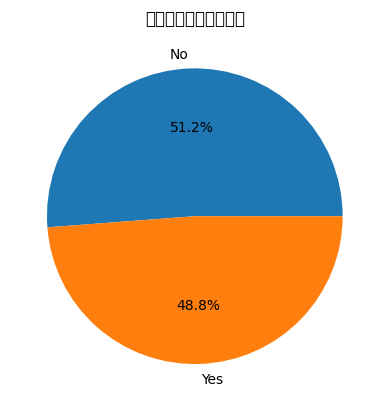

In [13]:
y = [17014, 16215]
x = ['No', 'Yes']
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title('五年内是否患上高血压')